1)If we give wrong Input show this error message.
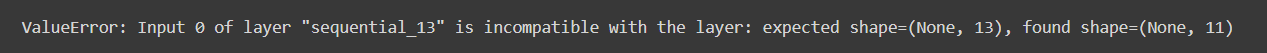



2)

|Hyperparameter       |Typical VaLue    |
|:-----------------   |:-----------------|
|Hidden activation    |Usually Relu         |
|Output activation    |None, Relu, logistic/tanh|
|Loss Function|MSE(Mean Square Error) or MAE (Mean Absolute Error)/ Huber(comb of MSE and MAE)|
|Optimizer|SGD (Stochastic Gradient Descent), Adam|


3)

|Hyperparameter	|Typical value|
|---------------|-------------|
|Input layer shape|	Same shape as number of features (e.g. 3 for # bedrooms, # bathrooms, # car spaces in housing price prediction)|
|Hidden layer(s)|	Problem specific, minimum = 1, maximum = unlimited|
|Neurons per hidden layer|	Problem specific, generally 10 to 100|
|Output layer shape|	Same shape as desired prediction shape (e.g. 1 for house price)|
|Hidden activation|	Usually ReLU (rectified linear unit)|
|Output activation|	None, ReLU, logistic/tanh|
|Loss function|	MSE (mean square error) or MAE (mean absolute error)/Huber (combination of MAE/MSE) if outliers|
|Optimizer|	SGD (stochastic gradient descent), Adam|

4)
1. Construct or import a pretrained model relavant to your problem

2. Compile the model(preapare it to be used with data)

  *   **Loss** - how wrong your model's predictions are
  compared to the truth labels(you want to minimise this)

  *   **Optimizer** - how your mdeol should update its iternal patterns to better its predictions.

  *   **Metric** - human interpretable values for how ell your model is doing.

3. Fit the model to the training data so it can discover patterns

  *   **Epochs** - how many times the model will go through all of the training examples.

4. Evaluate the model on the test data (how reliable are our model's predictions?)







5)

### Common ways to improve a deep model



*   Adding layers

*   Increase the number of hidden units

*   Change the activation functions
*   Change the optimization function


*   Change the learning rate

*   Fitting on more data
*   Fitting for longer


6)
### Split, Normalization with sklearn



```
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 42)
```



```
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
    )

ct.fit() and ct.transform()
```



7)
### Some Code Block


#### Sequential Model
```python
model_noNormalizeBasic = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape = [11])
])

model_noNormalizeBasic.compile(loss = tf.keras.losses.mae,
                               optimizer = tf.keras.optimizers.SGD(),
                               metrics = ["mae"])

history = model_noNormalizeBasic.fit(X_train, y_train, epochs = 100)

```

#### Other way of Sequential Model


```
model_noNormalizeAdvanced = tf.keras.Sequential()

model_noNormalizeAdvanced.add(tf.keras.layers.Dense(100, activation = "relu"))
model_noNormalizeAdvanced.add(tf.keras.layers.Dense(100, activation = "relu"))
model_noNormalizeAdvanced.add(tf.keras.layers.Dense(100, activation = "relu"))
model_noNormalizeAdvanced.add(tf.keras.layers.Dense(1))

model_noNormalizeAdvanced.compile(loss = tf.keras.losses.mae,
                                  optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                                  metrics = ["mae"])


history = model_noNormalizeAdvanced.fit(X_train, y_train, epochs = 1000)

history_noNormalizeAdvanced = pd.DataFrame(history.history)

history_noNormalizeAdvanced.plot()
plt.ylabel("loss")
plt.xlabel("epochs")

model_noNormalizeBasic.evaluate(X_test, y_test)
```

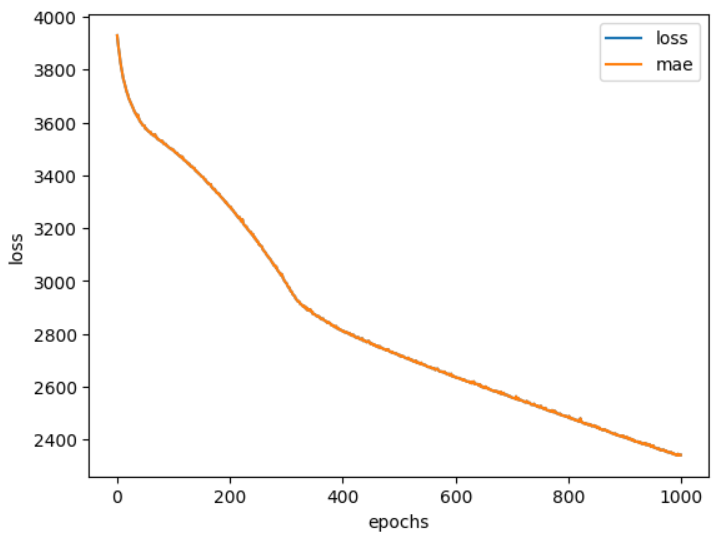



#### Functional API

```
inputs = tf.keras.Input(shape = (11))
Dense_1 = tf.keras.layers.Dense(100, activation = "relu")(inputs)
Dense_2 = tf.keras.layers.Dense(100, activation = "relu")(Dense_1)
Dense_3 = tf.keras.layers.Dense(100, activation = "relu")(Dense_2)
outputs = tf.keras.layers.Dense(1)(Dense_3)


model_normalizeAdvanced = tf.keras.Model(inputs = inputs, outputs = outputs)

model_normalizeAdvanced.compile(loss = tf.keras.losses.mae,
                             optimizer = tf.keras.optimizers.Adam(learning_rate = 0.0001),
                             metrics = ["mae"])

history = model_normalizeAdvanced.fit(X_train_normal, y_train,epochs = 1000)
```
